In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno

In [52]:
# Reading the data

data  = pd.read_csv('adult.csv')

In [53]:
data.sample(5)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
15578,35,Private,116541,Masters,14,Never-married,Prof-specialty,Own-child,White,Male,0,0,44,United-States,>50K
29585,24,Private,142528,Some-college,10,Never-married,Sales,Own-child,White,Male,0,0,20,United-States,<=50K
6327,42,State-gov,293791,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,50,United-States,>50K
2584,51,State-gov,231495,Doctorate,16,Married-civ-spouse,Exec-managerial,Husband,White,Male,7688,0,55,United-States,>50K
29370,18,Private,391585,HS-grad,9,Never-married,Machine-op-inspct,Other-relative,White,Female,0,0,40,United-States,<=50K


In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education.num     32561 non-null int64
marital.status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital.gain      32561 non-null int64
capital.loss      32561 non-null int64
hours.per.week    32561 non-null int64
native.country    32561 non-null object
income            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [55]:
# checking null values
df = data.copy()
df.isnull().sum().reset_index()

,index,0
0,age,0
1,workclass,0
2,fnlwgt,0
3,education,0
4,education.num,0
5,marital.status,0
6,occupation,0
7,relationship,0
8,race,0
9,sex,0


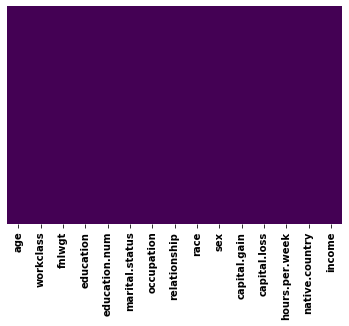

In [56]:
# checkinng for missing value
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [57]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

In [58]:
## getting categorical and numerical data as lists
def get_num_cat_variables(df):
    
    cat_list = []
    num_list=[]
    
    for col in df.columns:
        
        #categorical variables
        if df[col].dtypes == object:
            cat_list.append(col)
            
        else:
            num_list.append(col)
    return (cat_list, num_list)
            
        

In [59]:
df = data.copy()

In [60]:
lists = get_num_cat_variables(df)
num_list = lists[1]
cat_list = lists[0]

In [61]:
## function to display count of all catgegories within a categorical variable
def cat_display(cat_list, df):
    
    for col in cat_list:
        
        print("============================={}=====================\n".format(col))
        print(df[col].value_counts())

In [62]:
## There are question marks in some columnswhich means they are missing
cat_display(cat_list, df)

=============================workclass=====================

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64
=============================education=====================

HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64
=============================marital.status=====================

Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spo


=================workclass=============



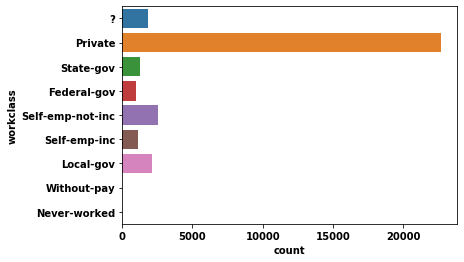


=================education=============



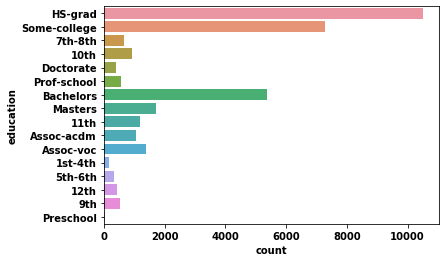


=================marital.status=============



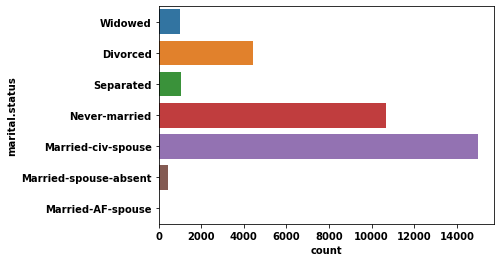


=================occupation=============



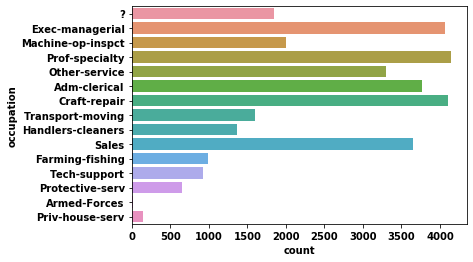


=================relationship=============



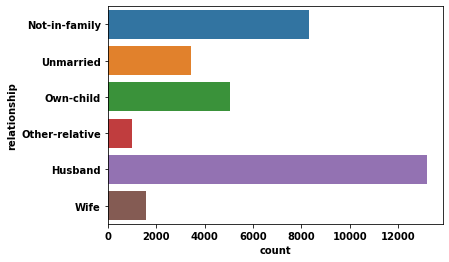


=================race=============



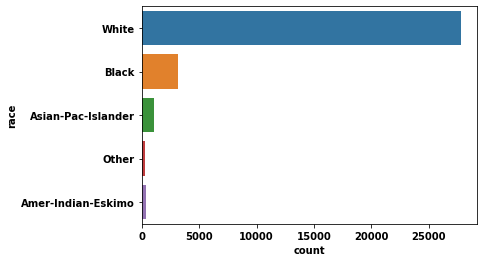


=================sex=============



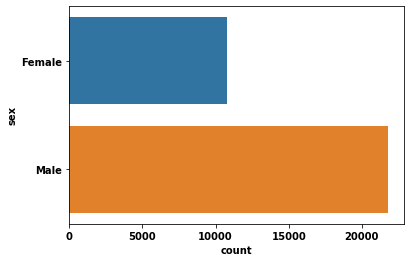


=================native.country=============



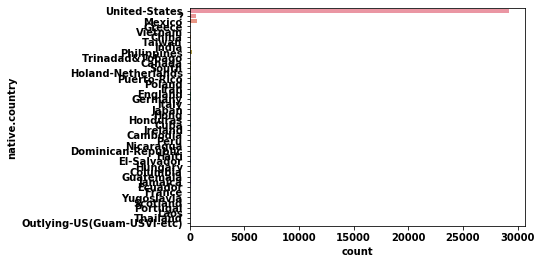


=================income=============



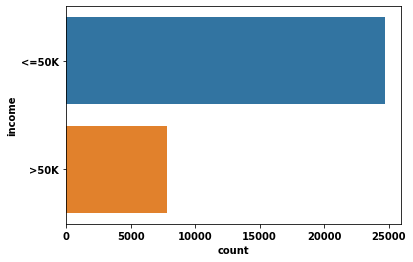

In [63]:
# plotting categorical data value counts to see the proportion of variables from each category
for cat in cat_list:
    
    print("\n================={}=============\n".format(cat))
    
    sns.countplot(y = cat, data = df)
    plt.show()

In [64]:
df['income'] = df['income'].apply(lambda x: 0 if x == "<=50K" else 1)

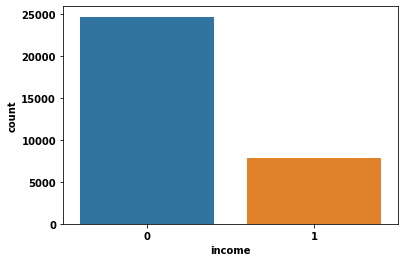

In [65]:
# checking if the output variable is balanced
sns.countplot('income',data=df)

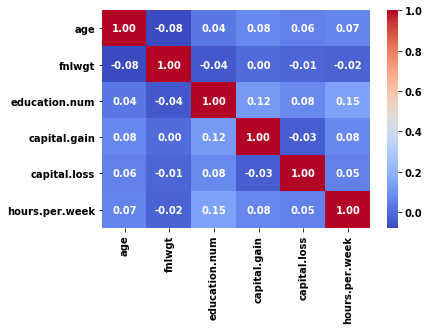

In [66]:
## no correlations among the numerical features
g = sns.heatmap(df[num_list].corr(),annot=True, fmt = ".2f", cmap = "coolwarm")
plt.show()

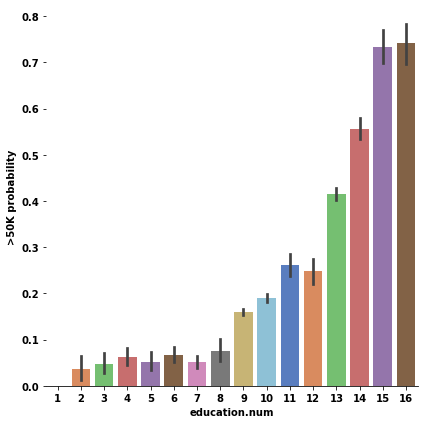

In [67]:
# plotting two categorical variables
g = sns.catplot(x="education.num",y="income",data=df,kind="bar", height= 6,palette = "muted")
g.despine(left=True)
g = g.set_ylabels(">50K probability")

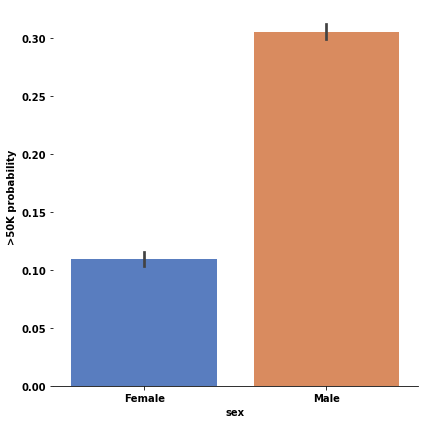

In [68]:
g = sns.catplot(x="sex",y="income", color = "", data=df,kind="bar", height= 6,palette = "muted")
g.despine(left=True)
g = g.set_ylabels(">50K probability")

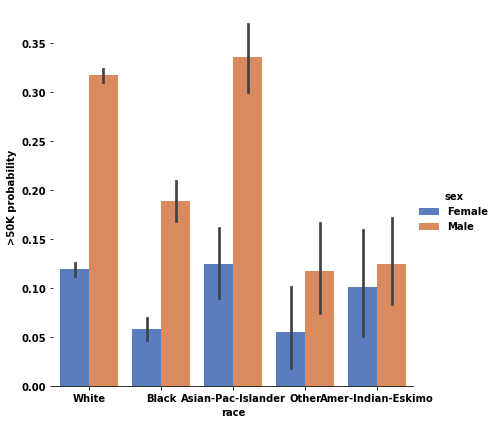

In [69]:
g = sns.catplot(x="race",y="income", data=df,kind="bar", hue = "sex" ,height= 6,palette = "muted")
g.despine(left=True)
g = g.set_ylabels(">50K probability")

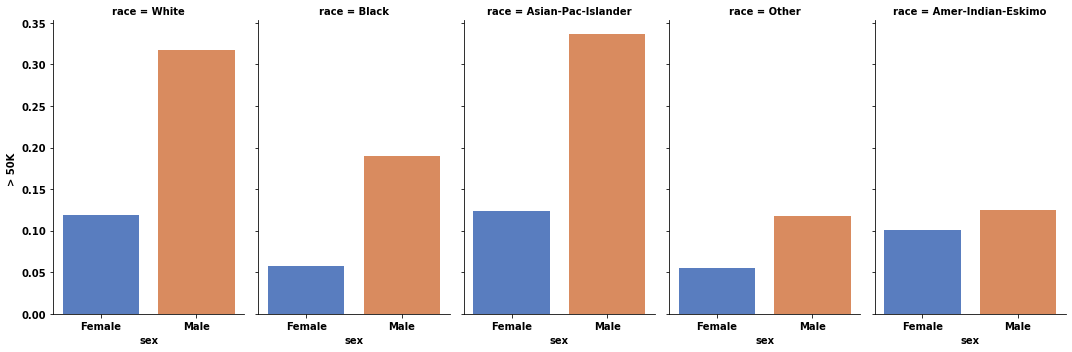

In [70]:
g = sns.catplot(x="sex", y="income", col="race",
                data=df, 
                kind="bar", ci=None, aspect=0.6, palette = "muted") 
g.set_ylabels("> 50K ")

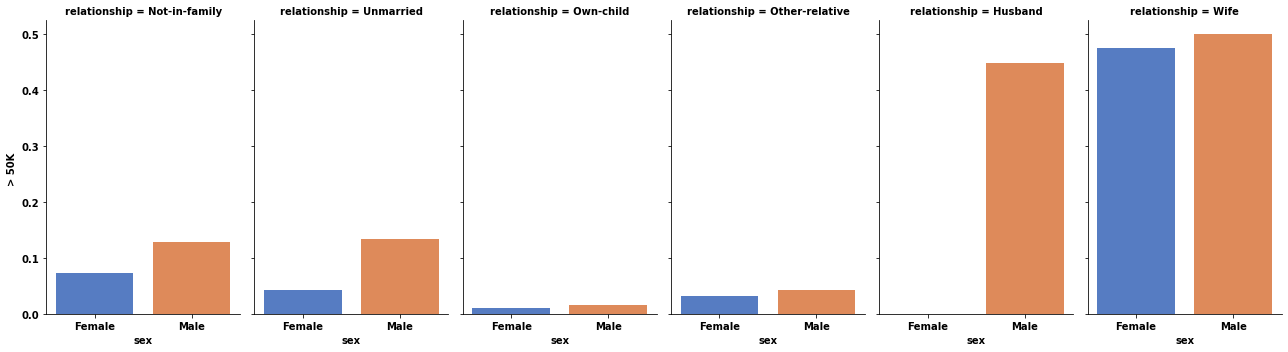

In [71]:
g = sns.catplot(x="sex", y="income", col="relationship",
                data=df, saturation= 0.8,
                kind="bar", ci=None, aspect=.6, palette = 'muted') 
g.set_ylabels("> 50K ")

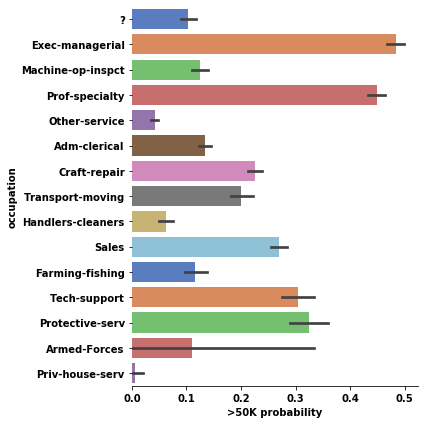

In [72]:
g = sns.catplot(x="income", y="occupation",data=df,kind="bar", height= 6,palette = "muted")
g.despine(left=True)
g = g.set_xlabels(">50K probability")

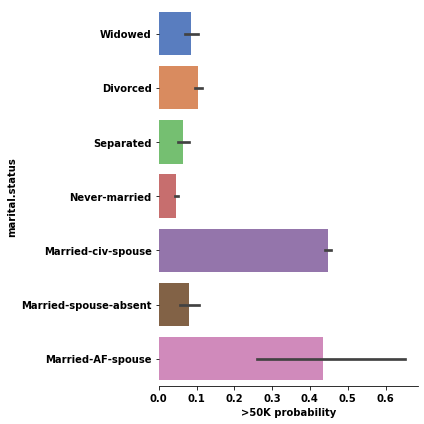

In [73]:
g = sns.catplot(x="income", y="marital.status",data=df,kind="bar", height= 6,palette = "muted")
g.despine(left=True)
g = g.set_xlabels(">50K probability")

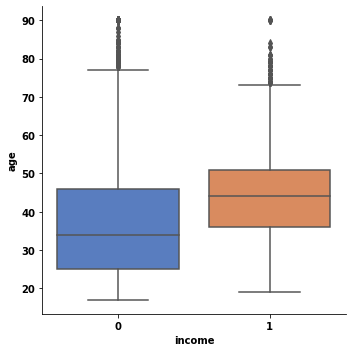

In [74]:
g = sns.catplot(x="income", y="age", palette = "muted",
               data=df, kind="box")

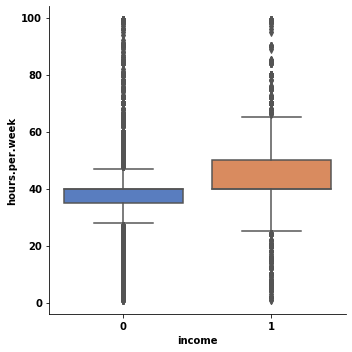

In [75]:
g = sns.catplot(x="income", y="hours.per.week", palette = "muted", 
               data=df, kind="box")

In [76]:
df.isin(['?']).sum().sort_values(ascending = False)

occupation        1843
workclass         1836
native.country     583
income               0
hours.per.week       0
capital.loss         0
capital.gain         0
sex                  0
race                 0
relationship         0
marital.status       0
education.num        0
education            0
fnlwgt               0
age                  0
dtype: int64

In [77]:
print("The shape before dropping null values is ", df.shape)
print("The shape after dropping null values is ", df.dropna().shape)

The shape before dropping null values is  (32561, 15)
The shape after dropping null values is  (32561, 15)


In [78]:
### replace missing values with nan
df = df.replace('?', np.nan)


In [79]:
df.isin(['?']).sum().sort_values(ascending = False)

income            0
native.country    0
hours.per.week    0
capital.loss      0
capital.gain      0
sex               0
race              0
relationship      0
occupation        0
marital.status    0
education.num     0
education         0
fnlwgt            0
workclass         0
age               0
dtype: int64

In [80]:
cat_list
cat_list.remove('income')
cat_list

['workclass',
 'education',
 'marital.status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native.country']

In [81]:

## creates dummy variables for categorical columns and returns new data frame
def one_hot_encoding(df, cat_col):
    
    print("The shape of df before one hot encoding is ", df.shape)
    dummy_df = pd.get_dummies(df[cat_col])
    
    print(cat_col)
    
    df = pd.concat([df, dummy_df], axis = 1)
    df = df.drop(cat_col, axis = 1)
    print("The shape of df after one hot encoding is ", df.shape)
   
    return df
    

In [82]:
encoded_df = one_hot_encoding(df, cat_list)

The shape of df before one hot encoding is  (32561, 15)
['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country']
The shape of df after one hot encoding is  (32561, 106)


In [83]:
encoded_df.columns

Index(['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss',
       'hours.per.week', 'income', 'workclass_Federal-gov',
       'workclass_Local-gov', 'workclass_Never-worked',
       ...
       'native.country_Portugal', 'native.country_Puerto-Rico',
       'native.country_Scotland', 'native.country_South',
       'native.country_Taiwan', 'native.country_Thailand',
       'native.country_Trinadad&Tobago', 'native.country_United-States',
       'native.country_Vietnam', 'native.country_Yugoslavia'],
      dtype='object', length=106)

In [84]:
## function to split data

from sklearn.model_selection import train_test_split

def test_train_split(df, ratio, dep_var):
    
    X = df.drop([dep_var], axis = 1).values
    y = df[dep_var].values
    
    
    X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size= ratio, random_state=42)
    
    return (X_train, X_test, y_train, y_test)
    

In [85]:
split_obj = test_train_split(encoded_df, 0.2, "income")

In [86]:
X_train = split_obj[0]
X_test = split_obj[1]
y_train = split_obj[2]
y_test = split_obj[3]

In [87]:
from sklearn.preprocessing import StandardScaler

# function to scale data
def scale_data(X_train, X_test):
    
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    
    return(X_train, X_test)
    
    

    
    
    
    

In [88]:
scale_obj = scale_data(X_train, X_test)
X_train = scale_obj[0]
X_test = scale_obj[1]


In [89]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

logit_model = LogisticRegression(solver='liblinear', random_state=0)
logit_model.fit(X_train, y_train)







LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [90]:
#simple logistic regression
from sklearn.metrics import classification_report


print(classification_report(logit_model.predict(X_test), y_test.reshape(-1,1)))

              precision    recall  f1-score   support

           0       0.93      0.88      0.90      5262
           1       0.58      0.72      0.64      1251

    accuracy                           0.85      6513
   macro avg       0.76      0.80      0.77      6513
weighted avg       0.86      0.85      0.85      6513



In [91]:
# pca for dimensionality reduction
from sklearn.decomposition import PCA   
pca= PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
dim = np.argmax(cumsum >= 0.95) + 1
print('The number of dimensions required to preserve 90% of variance is',dim)

The number of dimensions required to preserve 90% of variance is 87


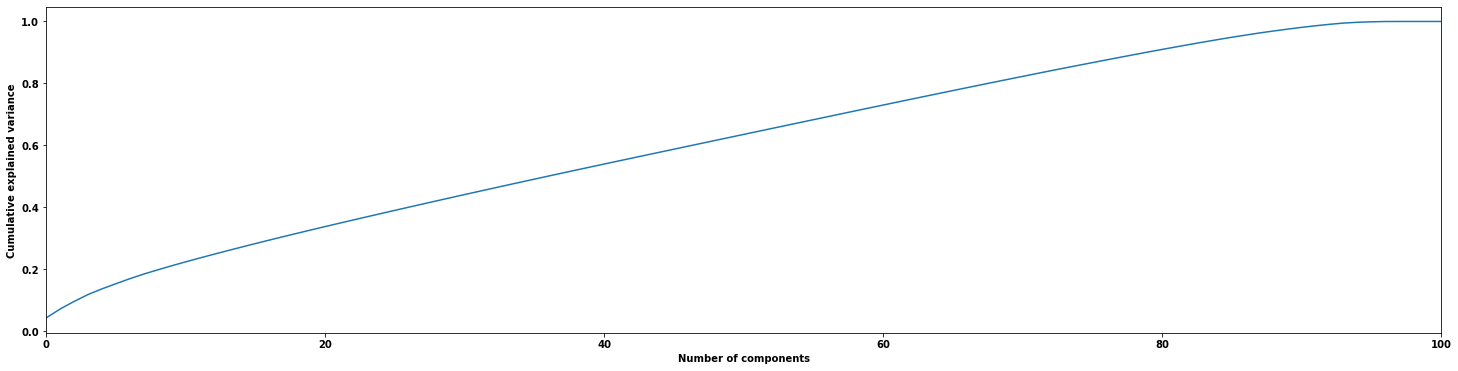

In [92]:

# scree plot to see explained variance (considering 90 percent of variance)

plt.figure(figsize=(25,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0,100,1)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

In [93]:
pca = PCA(87)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [94]:
## Logistic regression after pca
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

model_pca = LogisticRegression(solver='liblinear', random_state=0)
model_pca.fit(X_train_pca, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [95]:
from sklearn.metrics import classification_report


print(classification_report(model_pca.predict(X_test_pca), y_test.reshape(-1,1)))


              precision    recall  f1-score   support

           0       0.93      0.88      0.90      5299
           1       0.57      0.73      0.64      1214

    accuracy                           0.85      6513
   macro avg       0.75      0.80      0.77      6513
weighted avg       0.87      0.85      0.85      6513



In [96]:
print(classification_report(logit_model.predict(X_test), y_test.reshape(-1,1)))
    

              precision    recall  f1-score   support

           0       0.93      0.88      0.90      5262
           1       0.58      0.72      0.64      1251

    accuracy                           0.85      6513
   macro avg       0.76      0.80      0.77      6513
weighted avg       0.86      0.85      0.85      6513



In [111]:
### RFE for feature elimination

from sklearn.datasets import make_friedman1
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFE
from sklearn.svm import SVR


estimator = LogisticRegression(solver='liblinear')
selector = RFE(estimator, 3, step=1)
selector = selector.fit(X_train, y_train)
selector.support_


selector.ranking_

array([ 10,  36,   1,   1,  12,   9,  26,  44,  37,  27,  28,  78,  75,
        20,  53,  51,  62,  61,  55,  52,  50,  81,  97,  49,  47,  54,
        48,   4,  46,  96,   2,  42,  15,  14,   1,  11,  13,  41,  30,
        40,  17,  16,  19,  77,   5,   8,  22,  34,  33,  32,  57,  60,
        23,  56,   3,  24,   7,  66,  67,  85,  86,  35,   6,  18,  63,
        74,  68,  29,  79,  31,  94,  69,  87,  73,  59,  70, 101, 103,
        71,  82,  92, 100, 102,  89,  80,  58,  98,  88,  83,  43,  99,
        25,  72,  39,  91,  84,  65,  95,  64,  90,  93,  21,  38,  45,
        76])

In [112]:
print(classification_report(selector.predict(X_test), y_test.reshape(-1,1)))

              precision    recall  f1-score   support

           0       0.91      0.86      0.89      5238
           1       0.53      0.64      0.58      1275

    accuracy                           0.82      6513
   macro avg       0.72      0.75      0.73      6513
weighted avg       0.84      0.82      0.83      6513



In [99]:
## applying multiple models

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

validation_size = 0.20
seed = 7
num_folds = 10
scoring = 'roc-auc'

num_trees = 100
max_features = 3


models = []
models.append(('LR', LogisticRegression(solver = 'liblinear')))
models.append(('LR with reg', LogisticRegression(solver = 'liblinear', penalty = "l1")))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features)))

results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=10, random_state=seed)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='roc_auc')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.907092 (0.006580)
LR with reg: 0.907165 (0.006556)


C:\Users\ranji\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\ranji\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\ranji\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\ranji\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\ranji\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\ranji\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\ranji\Anacond

LDA: 0.893444 (0.006459)
KNN: 0.839703 (0.011318)
CART: 0.753841 (0.005593)
RF: 0.897951 (0.004955)


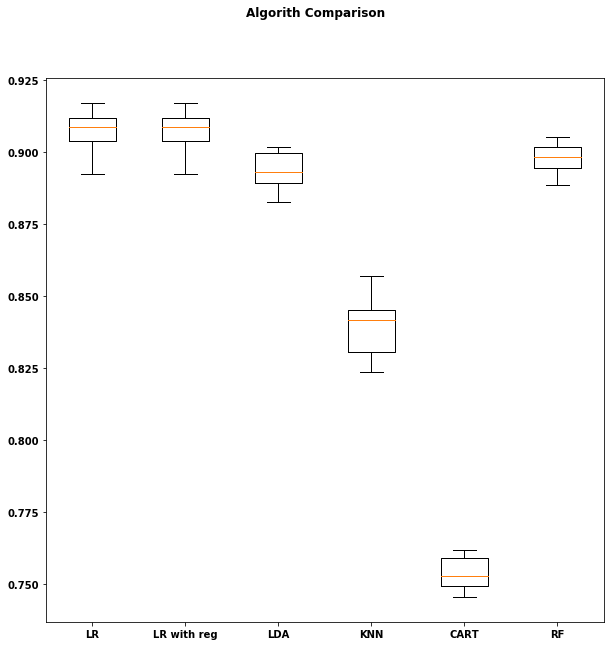

In [100]:
fig = plt.figure(figsize = (10,10))
fig.suptitle('Algorith Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [101]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

validation_size = 0.20
seed = 7
num_folds = 10
scoring = 'roc-auc'

num_trees = 100
max_features = 3


models = []
models.append(('LR', LogisticRegression(solver = 'liblinear')))

models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features)))

results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=10, random_state=seed)
    cv_results = cross_val_score(model, X_train_pca, y_train, cv=kfold, scoring='roc_auc')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.904838 (0.006524)
LDA: 0.891990 (0.007020)
KNN: 0.837676 (0.009060)
CART: 0.711232 (0.010989)
RF: 0.866118 (0.006873)


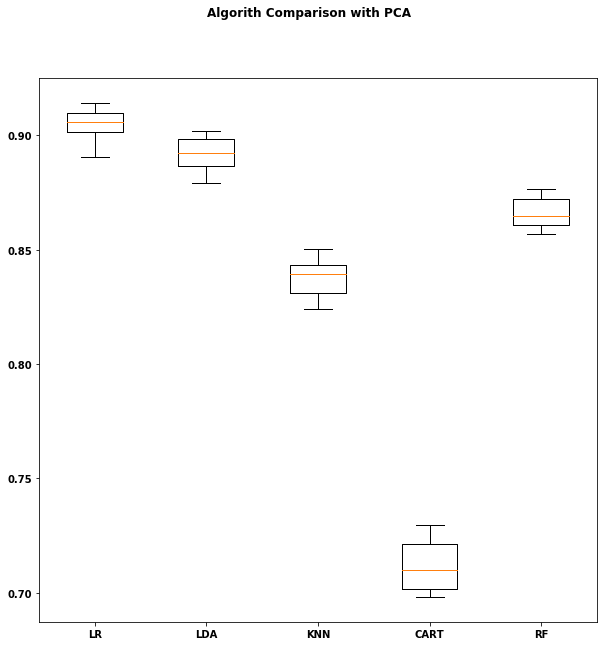

In [102]:
fig = plt.figure(figsize = (10,10))
fig.suptitle('Algorith Comparison with PCA')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [103]:
columns = list(encoded_df.drop(['income'], axis = 1).columns)
weights = logit_model.coef_

Text(0.5, 1.0, 'Top ten features in Logistic Regression')

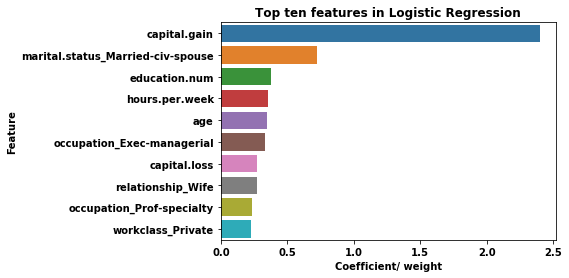

In [104]:
## plotting top ten weights of the simple logistic regression model

dict_weights = dict(zip(list(columns), (weights.tolist()[0])))
dict_weights = sorted(dict_weights.items() , key = lambda x: x[1], reverse = True)
dict_weights =dict(dict_weights)

sns.barplot( list(dict_weights.values())[:10], list(dict_weights.keys())[:10])
plt.xlabel("Coefficient/ weight")
plt.ylabel("Feature")
plt.title("Top ten features in Logistic Regression")

In [105]:
y_pred = logit_model.predict(X_test)


In [106]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.93      0.88      0.90      5262
           1       0.58      0.72      0.64      1251

    accuracy                           0.85      6513
   macro avg       0.76      0.80      0.77      6513
weighted avg       0.86      0.85      0.85      6513

